# **Un metodo para calcular el nivel de cosaguinidad y pedrigui de ganado**


#### Elaborado por:
#### Luis Arturo Arrieta con apoyo de OpenAI. (2023).
#### Escuela de Ciencias Agrarias


Problema a resolver: Usted es contratado para analizar un pedigree de bovinos de la raza Brangus, en
específico debe estimar las relaciones de parentesco de una familia de 7 miembros y para
ello dispone un registro genealógico donde el vector de padres es (0,0,1,1,3,1,5) y el de
madres es (0,0,0,2,4,4,6)

Gráfico del pedigree a mano

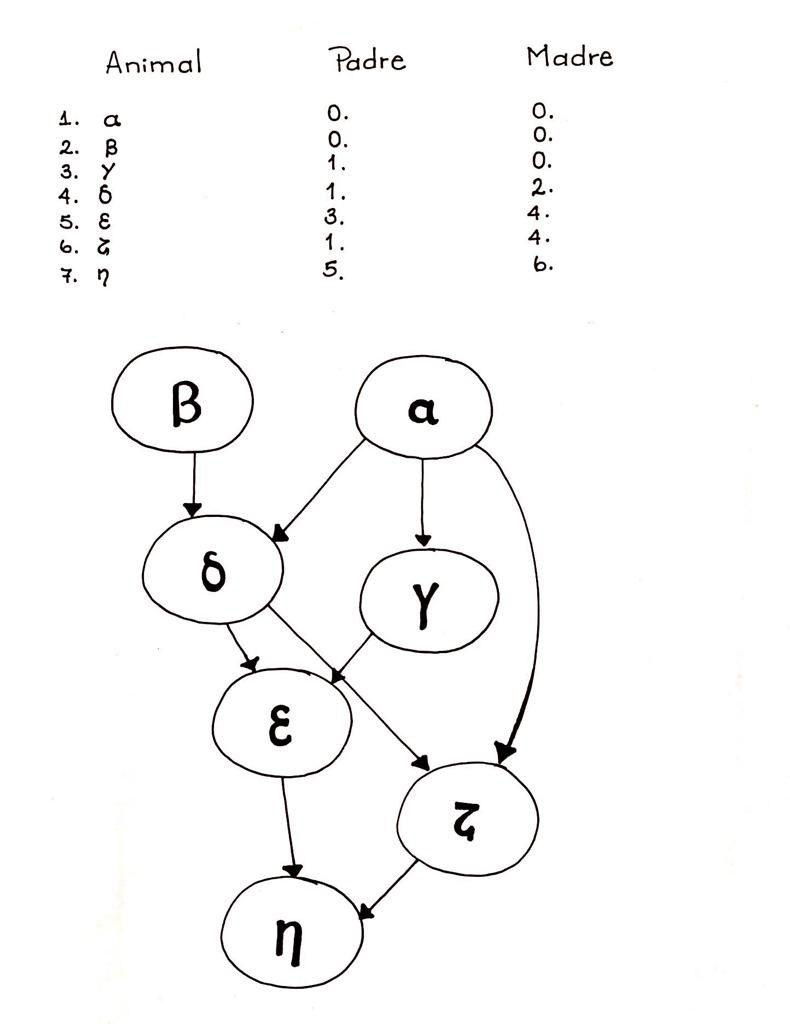

In [ ]:
from IPython.display import Image
Image(filename='arbol_genealogico.jpeg')

Matriz de relaciones de parentesco “A” realizando los cálculo a pie

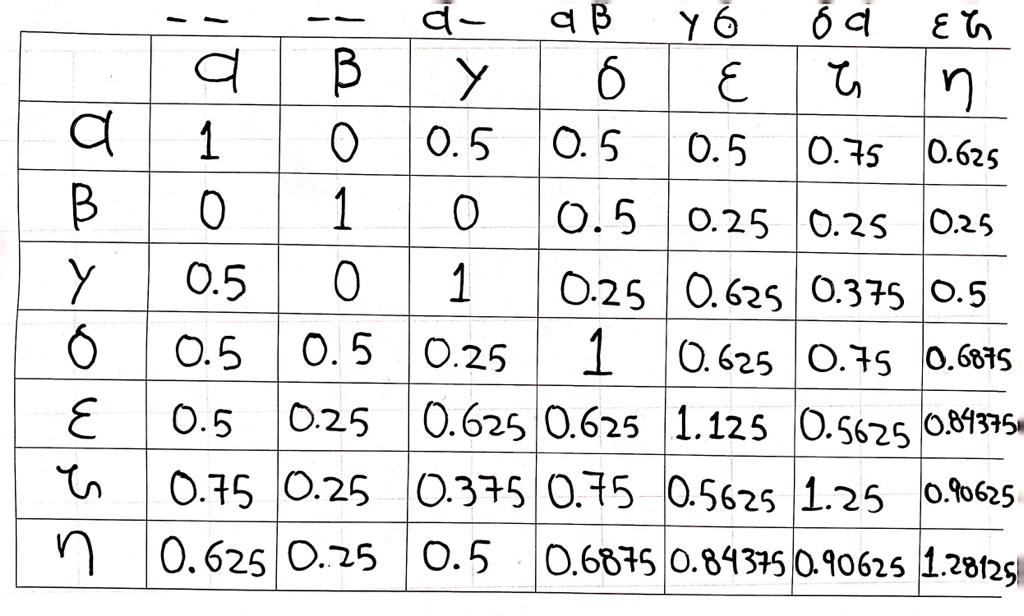

In [ ]:
Image(filename='matriz_de_parentescos_aditivos.jpeg')

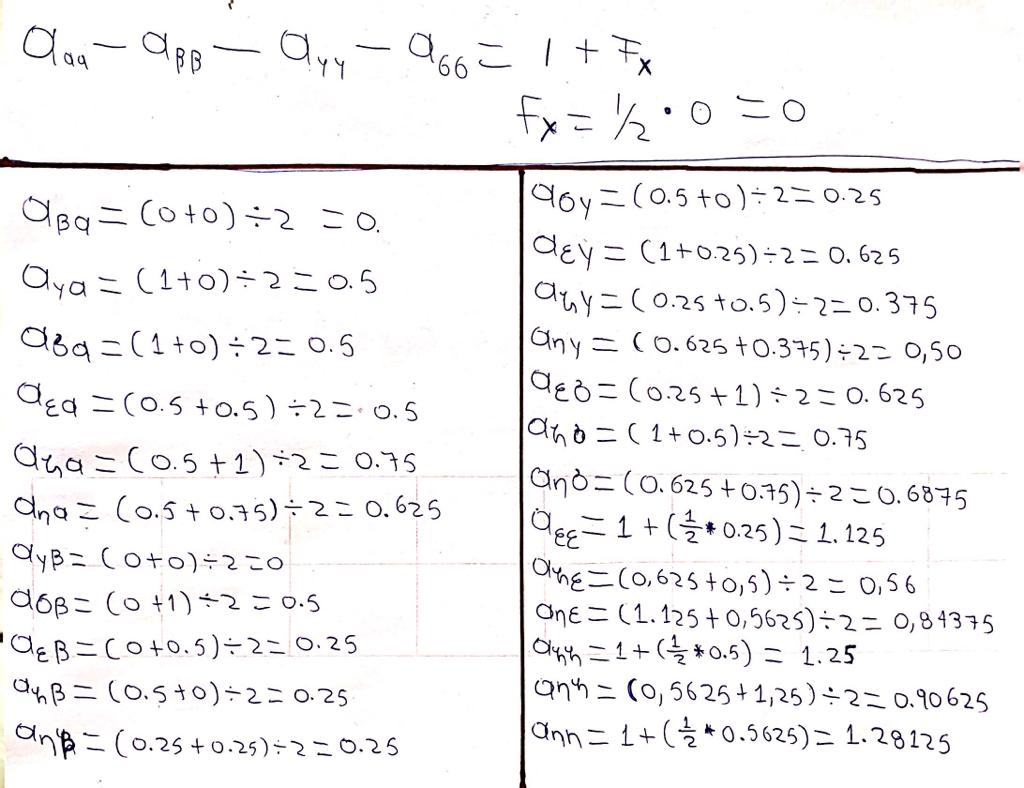

In [ ]:
Image(filename='calculos_matriz_de_parentescos.jpeg')

El individuo con mayor grado de consaguinidad es η debido a que posee los valores más cercanos a 2 y por lo tanto es el más consaguineo.

Gráfico del pedigree en Pyhton

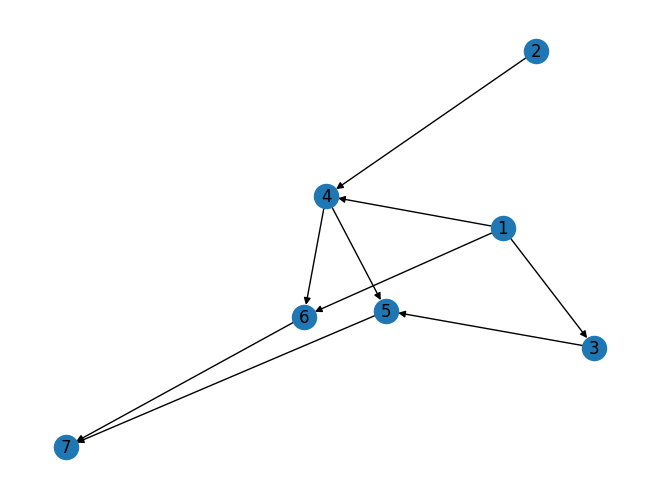

In [ ]:
import networkx as nx
import matplotlib.pyplot as plt

# Crear una lista con los nodos del padre y de la madre
padres = [0, 0, 1, 1, 3, 1, 5]
madres = [0, 0, 0, 2, 4, 4, 6]

# Crear un gráfico dirigido
G = nx.DiGraph()

# Agregar nodos al gráfico
for i in range(1, len(padres)+1):
    G.add_node(i)

# Agregar bordes al gráfico
for i in range(len(padres)):
    if padres[i] != 0:
        G.add_edge(padres[i], i+1)
    if madres[i] != 0:
        G.add_edge(madres[i], i+1)

# Ordenar los nodos en orden topológico ascendente
nodes = list(nx.topological_sort(G))

# Dibujar el árbol genealógico
nx.draw(G, with_labels=True, nodelist=nodes)
plt.show()



Ejemplo de script adaptado a pyhton del codigo en R generado por: Putz, A. (2018). Additive Genetic Relationship Matrix (A matrix) in Animal Breeding. Recuperado 18 de mayo de 29d. C., de http://rstudio-pubs-static.s3.amazonaws.com/382572_35603135de154a79a72b9f04064be2f2.html

In [ ]:
import pandas as pd

# create original pedigree
ped = pd.DataFrame(data=[[3, 0, 0], [4, 0, 0], [5, 1, 0], [6, 1, 2], [7, 3, 4], [8, 1, 4], [9, 5, 6]], columns=["Animal", "Sire", "Dam"], index=[3, 4, 5, 6, 7, 8, 9])

# print ped
print(ped)



   Animal  Sire  Dam
3       3     0    0
4       4     0    0
5       5     1    0
6       6     1    2
7       7     3    4
8       8     1    4
9       9     5    6


In [ ]:
import numpy as np

def createA(ped):
    """
    Given the pedigree, return additive relationship matrix 'A'.

    Arguments:
    - ped: pandas DataFrame
        - ped needs to be in the format
            column 1 = animal
            column 2 = sire
            column 3 = dam
        - NOTE: Unknown parents should be coded as ZERO (NOT 'NA')

    Literature: Henderson, C. R. 1976.
    Simple Method for Computing the Inverse of a Numerator Relationship
    Matrix Used in Prediction of Breeding Values. Biometrics 32:69-83.

    Author: Gota Morota <morota at wisc dot edu>
    Create: 16-Apr-2009
    Last-Modified: 1-Apr-2010
    License: GPLv3 or later
    """
    # Check if only one argument is passed
    if len(ped.columns) != 3:
        raise ValueError("Only the pedigree is required (Animal, Sire, Dam)")

    # Extract the sire and dam vectors
    s = ped.iloc[:, 1]
    d = ped.iloc[:, 2]

    # Stop if they are different lengths
    if len(s) != len(d):
        raise ValueError("Size of the sire vector and dam vector are different!")

    # set number of animals and empty vector
    n = len(s)
    N = n + 1
    A = np.zeros((N, N))

    # set sires and dams
    s = np.where(s == 0, N, s)
    d = np.where(d == 0, N, d)

    start_time = time.time()

    # Begin for loop
    for i in range(n):
        # equation for diagonals
        A[i, i] = 1 + A[s[i] - 1, d[i] - 1] / 2

        for j in range(i + 1, n):  # only do half of the matrix (symmetric)
            if j > n:
                break
            A[i, j] = (A[i, s[j] - 1] + A[i, d[j] - 1]) / 2  # half relationship to parents
            A[j, i] = A[i, j]  # symmetric matrix, so copy to other off-diag

    # print the time it took to complete
    print("\tTime it took (sec):", time.time() - start_time)

    # return the A matrix
    return A[0:n, 0:n]


In [ ]:
import numpy as np
import pandas as pd

# create A
ped_np = ped.to_numpy()  # convert ped to numpy array
n = ped_np.shape[0]
A = np.zeros((n, n))

# Extract the sire and dam vectors
s = ped_np[:, 1]
d = ped_np[:, 2]

# Stop if they are different lengths
if len(s) != len(d):
    raise ValueError("size of the sire vector and dam vector are different!")

# set sires and dams
s = np.where(s == 0, n, s)
d = np.where(d == 0, n, d)

start_time = pd.Timestamp.now()

# Begin for loop
for i in range(n):
    # equation for diagonals
    A[i, i] = 1 + A[s[i] - 1, d[i] - 1] / 2

    for j in range(i + 1, n):  # only do half of the matrix (symmetric)
        if j > n:
            break
        A[i, j] = (A[i, s[j] - 1] + A[i, d[j] - 1]) / 2  # half relationship to parents
        A[j, i] = A[i, j]  # symmetric matrix, so copy to other off-diag

# print the time it took to complete
print("\tTime it took (sec):", pd.Timestamp.now() - start_time)

# return the A matrix
A_pd = pd.DataFrame(A[0:n, 0:n])  # convert A back to pandas DataFrame


	Time it took (sec): 0 days 00:00:00.000759


Matriz de parentescos aditivos

In [ ]:
import numpy as np
from scipy.sparse import csr_matrix

# Set row and column names for A matrix
row_names = np.arange(1, A.shape[0]+1)
col_names = np.arange(1, A.shape[1]+1)

# Convert A to a sparse matrix
A = csr_matrix(A)

# Print A
print(np.round(A.todense(), 4))



[[1.     2.     3.     4.     5.     6.     7.    ]
 [1.     0.     0.5    0.5    0.5    0.75   0.625 ]
 [0.     1.     0.     0.5    0.25   0.25   0.25  ]
 [0.5    0.     1.3125 0.25   0.7812 0.375  0.5781]
 [0.5    0.5    0.25   1.     0.625  0.75   0.6875]
 [0.5    0.25   0.7812 0.625  1.125  0.5625 0.8438]
 [0.75   0.25   0.375  0.75   0.5625 1.25   0.9062]
 [0.625  0.25   0.5781 0.6875 0.8438 0.9062 1.2812]]


Cargar base de datos de ganado para analizar para analizar DEPs en Ganado

Cargar base de datos

In [ ]:
import pandas as pd
from pathlib import Path

dir_prin = Path.cwd()
dir_entra = dir_prin/'entradas'
d = pd.read_csv(dir_entra/'INTA_Los_Diamantes.csv', encoding='ISO-8859-1')



In [ ]:
d.head()

,NumH,Regg,sx,NacCria,Padre,RegPad,Madre,RegMad,CONS,DEP_PN,...,EX_P550,DEP_CE550,EX_CE_550,DEP_P730,EX_P730,DEP_CE730,EX_CE730,MGT,CRIADOR,ULTIMO_PROPIETARIO
0,931-20,01-62450,M,20/03/2020,204-13,01-49352,516-13,01-55309,"0,01","-0,331020314547837",...,"0,299835803622972","0,360032765399738","0,371362959597742","-0,360389252948886",0,"-0,0239272608125819",0,"0,0663478072458825",INTA-LOS DIAMANTES,INTA-LOS DIAMANTES
1,927-20,01-62449,M,13/03/2020,209-14,01-51082,962-12,01-44959,"0,02","-0,130020314547838",...,"0,283119653418784","0,0680327653997377","0,32178374122911","-0,0378892529488859",0,"0,0000727391874181006",0,"0,0329556098427232",INTA-LOS DIAMANTES,INTA-LOS DIAMANTES
2,921-20,01-62447,M,11/03/2020,193-13,01-47830,662-16,01-55041,0,"-0,219520314547837",...,"0,306695213415032","-0,120967234600262","0,386285409911438","0,148110747051114","0,0264663482486986","-0,0004272608125819",0,"-0,0174760184281991",INTA-LOS DIAMANTES,INTA-LOS DIAMANTES
3,919-20,01-62446,M,09/03/2020,204-13,01-49352,926-11,01-52152,"0,02","-0,0945203145478375",...,"0,317765397365375","0,362532765399738","0,386285409911438","-0,400889252948886",0,"-0,0214272608125819",0,"0,0663017671134523",INTA-LOS DIAMANTES,INTA-LOS DIAMANTES
4,906-20,01-62454,H,09/03/2020,204-13,01-49352,512-13,01-47180,"0,02","-0,204020314547837",...,"0,342721126745202","0,243032765399738","0,371362959597742","-0,385889252948886",0,"-0,0374272608125819",0,"0,0628754069014237",INTA-LOS DIAMANTES,INTA-LOS DIAMANTES


In [ ]:
d.tail()

,NumH,Regg,sx,NacCria,Padre,RegPad,Madre,RegMad,CONS,DEP_PN,...,EX_P550,DEP_CE550,EX_CE_550,DEP_P730,EX_P730,DEP_CE730,EX_CE730,MGT,CRIADOR,ULTIMO_PROPIETARIO
720,899/8,374007,H,25/12/1978,46/5,208504,914/7,339154,0,"-0,220520314547837",...,"0,0950899411205176","0,135532765399738","0,0928407398994364","-0,00938925294888594","0,0264663482486986","-0,0054272608125819","0,0742269619025209","0,00842429619444527",UNITED STATES SUGAR CORP.ÿ,M.A.G. EST. EXPERIMENTAL LOS DIAMANTES
721,412,031951,H,01/03/1978,0,07844,274,011303,0,"-0,297520314547837",...,"0,0783737270442906","0,186032765399738","0,144035650644958","0,0256107470511141","0,0264663482486986","0,0120727391874181",0,"0,0343299822170991",INTA-LOS DIAMANTES,INTA-LOS DIAMANTES
722,611/7,277520,M,10/02/1976,308/5,214837,399/4,226313,0,"-0,290520314547837",...,"0,0181774852227426","0,160032765399738",0,"0,0521107470511141","0,0264663482486986","0,0045727391874181",0,"0,0434483797364184",UNITED STATES SUGAR CORP.ÿ,M.A.G. EST. EXPERIMENTAL LOS DIAMANTES
723,349/1,305547,H,03/04/1975,0,157013,20/4,299021,0,"-0,299020314547837",...,"0,0181774852227426","0,184032765399738",0,"0,0256107470511141","0,0264663482486986","0,0120727391874181",0,"0,0486847201976891",INTA-LOS DIAMANTES,INTA-LOS DIAMANTES
724,959,228720,H,24/01/1968,478,115129,778,188790,0,"-0,278020314547837",...,"0,0181774852227426","0,194032765399738",0,"0,0341107470511141","0,0264663482486986","0,0115727391874181",0,"0,0506915277879481",DESCONOCIDO,M.A.G. EST. EXPERIMENTAL LOS DIAMANTES


Filtrar para dejar solo toros

In [ ]:
df = d.loc[d['sx'] == 'M']


In [ ]:
df.head()

,NumH,Regg,sx,NacCria,Padre,RegPad,Madre,RegMad,CONS,DEP_PN,...,EX_P550,DEP_CE550,EX_CE_550,DEP_P730,EX_P730,DEP_CE730,EX_CE730,MGT,CRIADOR,ULTIMO_PROPIETARIO
0,931-20,01-62450,M,20/03/2020,204-13,01-49352,516-13,01-55309,"0,01","-0,331020314547837",...,"0,299835803622972","0,360032765399738","0,371362959597742","-0,360389252948886",0,"-0,0239272608125819",0,"0,0663478072458825",INTA-LOS DIAMANTES,INTA-LOS DIAMANTES
1,927-20,01-62449,M,13/03/2020,209-14,01-51082,962-12,01-44959,"0,02","-0,130020314547838",...,"0,283119653418784","0,0680327653997377","0,32178374122911","-0,0378892529488859",0,"0,0000727391874181006",0,"0,0329556098427232",INTA-LOS DIAMANTES,INTA-LOS DIAMANTES
2,921-20,01-62447,M,11/03/2020,193-13,01-47830,662-16,01-55041,0,"-0,219520314547837",...,"0,306695213415032","-0,120967234600262","0,386285409911438","0,148110747051114","0,0264663482486986","-0,0004272608125819",0,"-0,0174760184281991",INTA-LOS DIAMANTES,INTA-LOS DIAMANTES
3,919-20,01-62446,M,09/03/2020,204-13,01-49352,926-11,01-52152,"0,02","-0,0945203145478375",...,"0,317765397365375","0,362532765399738","0,386285409911438","-0,400889252948886",0,"-0,0214272608125819",0,"0,0663017671134523",INTA-LOS DIAMANTES,INTA-LOS DIAMANTES
13,907-19,01-62441,M,12/12/2019,204-13,01-49352,948-11,01-44536,"0,01","0,151479685452163",...,"0,33870519232422","0,455032765399738","0,386285409911438","-0,359889252948886",0,"-0,0209272608125819",0,"0,0936728106617318",INTA-LOS DIAMANTES,INTA-LOS DIAMANTES


In [ ]:
d.tail()

,NumH,Regg,sx,NacCria,Padre,RegPad,Madre,RegMad,CONS,DEP_PN,...,EX_P550,DEP_CE550,EX_CE_550,DEP_P730,EX_P730,DEP_CE730,EX_CE730,MGT,CRIADOR,ULTIMO_PROPIETARIO
720,899/8,374007,H,25/12/1978,46/5,208504,914/7,339154,0,"-0,220520314547837",...,"0,0950899411205176","0,135532765399738","0,0928407398994364","-0,00938925294888594","0,0264663482486986","-0,0054272608125819","0,0742269619025209","0,00842429619444527",UNITED STATES SUGAR CORP.ÿ,M.A.G. EST. EXPERIMENTAL LOS DIAMANTES
721,412,031951,H,01/03/1978,0,07844,274,011303,0,"-0,297520314547837",...,"0,0783737270442906","0,186032765399738","0,144035650644958","0,0256107470511141","0,0264663482486986","0,0120727391874181",0,"0,0343299822170991",INTA-LOS DIAMANTES,INTA-LOS DIAMANTES
722,611/7,277520,M,10/02/1976,308/5,214837,399/4,226313,0,"-0,290520314547837",...,"0,0181774852227426","0,160032765399738",0,"0,0521107470511141","0,0264663482486986","0,0045727391874181",0,"0,0434483797364184",UNITED STATES SUGAR CORP.ÿ,M.A.G. EST. EXPERIMENTAL LOS DIAMANTES
723,349/1,305547,H,03/04/1975,0,157013,20/4,299021,0,"-0,299020314547837",...,"0,0181774852227426","0,184032765399738",0,"0,0256107470511141","0,0264663482486986","0,0120727391874181",0,"0,0486847201976891",INTA-LOS DIAMANTES,INTA-LOS DIAMANTES
724,959,228720,H,24/01/1968,478,115129,778,188790,0,"-0,278020314547837",...,"0,0181774852227426","0,194032765399738",0,"0,0341107470511141","0,0264663482486986","0,0115727391874181",0,"0,0506915277879481",DESCONOCIDO,M.A.G. EST. EXPERIMENTAL LOS DIAMANTES


Nos piden analizar los DEP que transmite el padre asociados a crecimiento y leche, por lo tanto se analizaran el DEP MATERNO TOTAL al destete en machos.

## DEP_MAT_TOTAL

La columna "DEP_MAT_TOTAL" contiene valores con "," y los ocupamos con ".", ademas posee valores infinitos, vamos a hacer el cambio para evitar errores a la hora de graficar

In [ ]:
# Reemplazar comas por puntos en la columna "DEP_MAT_TOTAL"
df['DEP_MAT_TOTAL'] = df['DEP_MAT_TOTAL'].str.replace(',', '.')

# Convertir la columna "DEP_MAT_TOTAL" a un tipo de datos numérico
df['DEP_MAT_TOTAL'] = df['DEP_MAT_TOTAL'].astype(float)

# Eliminar filas que contengan valores no finitos
df = df.dropna()


<ipython-input-121-cea25c4ae7fd>:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['DEP_MAT_TOTAL'] = df['DEP_MAT_TOTAL'].str.replace(',', '.')
<ipython-input-121-cea25c4ae7fd>:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['DEP_MAT_TOTAL'] = df['DEP_MAT_TOTAL'].astype(float)


In [ ]:
print(df['DEP_MAT_TOTAL'].tail())


693    0.31342
704   -1.63833
708   -2.66033
718    0.29817
722    0.44017
Name: DEP_MAT_TOTAL, dtype: float64


a) genere la función de densidad así como también los parámetros asociados a la
distribución de dicho DEP

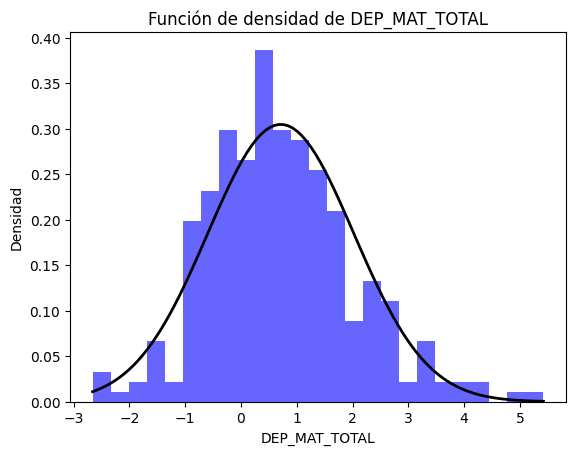

Los parámetros de la distribución son: (0.712779308650067, 1.3095950155114464)


In [ ]:
import scipy.stats as stats
import matplotlib.pyplot as plt

# Seleccionar la columna DEP_PN
dep_pn = df['DEP_MAT_TOTAL']
# Calcular la función de densidad y los parámetros
dist = getattr(stats, 'norm')
params = dist.fit(dep_pn)
pdf = dist.pdf(dep_pn, *params)

# Graficar la función de densidad
plt.hist(dep_pn, bins=25, density=True, alpha=0.6, color='b')
x = np.linspace(dep_pn.min(), dep_pn.max(), 100)
plt.plot(x, dist.pdf(x, *params), 'k-', linewidth=2)
plt.title('Función de densidad de DEP_MAT_TOTAL')
plt.xlabel('DEP_MAT_TOTAL')
plt.ylabel('Densidad')
plt.show()

# Imprimir los parámetros
print(f"Los parámetros de la distribución son: {params}")

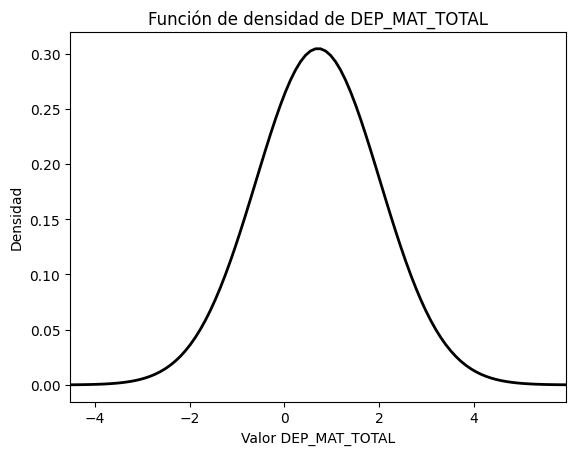

In [ ]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from scipy.stats import norm

dep_pn = df['DEP_MAT_TOTAL']
media, desviacion = norm.fit(dep_pn)
xmin, xmax = plt.xlim(media - 4*desviacion, media + 4*desviacion) # Ajuste de los límites del eje x
x = np.linspace(xmin, xmax, 100)
p = norm.pdf(x, media, desviacion)
plt.plot(x, p, 'k', linewidth=2)
plt.title("Función de densidad de DEP_MAT_TOTAL")
plt.xlabel("Valor DEP_MAT_TOTAL")
plt.ylabel("Densidad")
plt.show()


Datos resumen de toda la población

In [ ]:
df[['DEP_MAT_TOTAL']].describe()



,DEP_MAT_TOTAL
count,280.000000
mean,0.712779
std,1.311940
min,-2.660330
25%,-0.224517
50%,0.589420
75%,1.437420
max,5.421920


Top 10 DEP DEP_MAT_TOTAL

In [ ]:
top_10 = df.nlargest(10, 'DEP_MAT_TOTAL')



In [ ]:
print(top_10[['Regg', 'DEP_MAT_TOTAL','MGT', 'EX_P205']])


         Regg  DEP_MAT_TOTAL                 MGT            EX_P205
503  01-22014        5.42192   0,197364871806724  0,384097373902437
463  01-26568        4.89717   0,138041710962358  0,481683036899283
404  01-30650        4.42992   0,155601383311804  0,422335060523444
466  01-26264        4.30992   0,088897633451218  0,483866653247472
22   01-61070        3.90992   0,112642360306132  0,427464258071603
340  01-35154        3.88192  0,0822844999762687  0,424909104048591
304  01-37634        3.61517  0,0928197379920348  0,435019699347582
118  01-55046        3.48567   0,135236693071131  0,437502561733035
117  01-55052        3.44292    0,13778329351196  0,435019699347582
326  01-37184        3.39917  0,0904612170000642  0,424909104048591


Selecionaría los individuos 01-22014, 01-26568 y 01-30650 debido a que tienen los DEP_MAT_TOTAL más altos y valores de merito genetico total bastante aceptables. Aunque la exactitud del 01-22014 está por debajo del 40%, los individuos 01-26568 y 01-30650 la superan. Por lo tanto, seleccionaría el individuo 01-26568, ya que tiene una mayor exactitud que el 01-22014 y, aunque sacrifica un poco de los valores altos de DEP_MAT_TOTAL, asegura que esas buenas características se hereden a la progenie. Además, en comparación con la población total, el valor del 01-26568 es mayor que la media, que es de 0.712779




In [ ]:
!python --version


Python 3.9.16


In [ ]:
import sys
print(sys.version)



3.9.16 (main, Dec  7 2022, 01:11:51) 
[GCC 9.4.0]


Paquetería utilizada

In [ ]:
!pip list

Package                       Version
----------------------------- --------------------
absl-py                       1.4.0
alabaster                     0.7.13
albumentations                1.2.1
altair                        4.2.2
anyio                         3.6.2
appdirs                       1.4.4
argon2-cffi                   21.3.0
argon2-cffi-bindings          21.2.0
arviz                         0.15.1
astropy                       5.2.2
astunparse                    1.6.3
attrs                         23.1.0
audioread                     3.0.0
autograd                      1.5
Babel                         2.12.1
backcall                      0.2.0
beautifulsoup4                4.11.2
bleach                        6.0.0
blis                          0.7.9
blosc2                        2.0.0
bokeh                         2.4.3
branca                        0.6.0
CacheControl                  0.12.11
cached-property               1.5.2
cachetools                    5.3.0
cata